In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ww_tobacco = pd.read_csv("tobacco_use_ww.csv")
ww_tobacco

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4
4,AFR,Africa,GHA,Ghana,2018,Female,0.4
...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5


<AxesSubplot:>

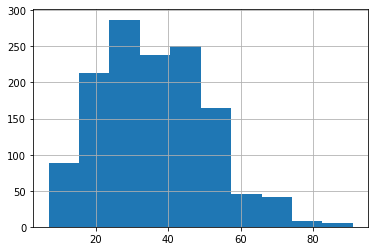

In [3]:
mal = ww_tobacco[ww_tobacco["Gender"]=="Male"].copy()
mal = mal.set_index(["Location", "Year"])
mal["Value"].hist()

<AxesSubplot:>

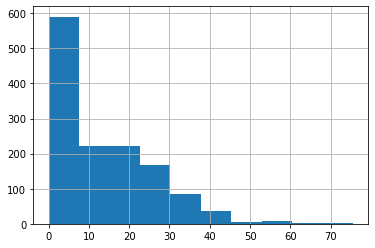

In [4]:
fem = ww_tobacco[ww_tobacco["Gender"]=="Female"].copy()
fem = fem.set_index(["Location", "Year"])
fem["Value"].hist()

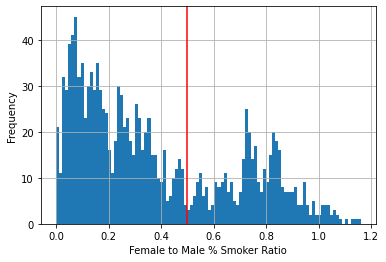

In [5]:
bi = fem["Value"] / mal["Value"]
bi.hist(bins = 100)
plt.axvline(x=.5, color ='red')
plt.xlabel("Female to Male % Smoker Ratio")
plt.ylabel("Frequency")
plt.show()

In [6]:
# looks like we can seperate the two groups at .5 as the ratio

In [7]:
bi

Location  Year
Albania   2000    0.193380
          2005    0.180832
          2010    0.171053
          2013    0.165385
          2014    0.164410
                    ...   
Zimbabwe  2014    0.057348
          2015    0.054545
          2016    0.051471
          2017    0.052045
          2018    0.049057
Name: Value, Length: 1341, dtype: float64

In [8]:
temp = bi.reset_index()
temp = temp[temp["Year"] == 2018]
temp

,Location,Year,Value
8,Albania,2018,0.156436
17,Algeria,2018,0.038567
26,Andorra,2018,0.774278
35,Argentina,2018,0.546099
44,Armenia,2018,0.030888
...,...,...,...
1304,Uzbekistan,2018,0.055794
1313,Vanuatu,2018,0.073333
1322,Yemen,2018,0.286154
1331,Zambia,2018,0.176000


In [12]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

In [16]:
import plotly.graph_objects as go
fig = go.Figure(data = go.Choropleth(
    locations=temp['Location'], # The abbreviation of code
    z=temp['Value'],# Your data value
    locationmode='country names', # range
    colorscale='Reds',
    colorbar_title="Percentage",
))

fig.update_layout(title={
        'text': "Female to Male % Smoker Ratio (2018)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                 )
fig.show()

In [9]:
parent_dict = ww_tobacco.set_index("Location")["ParentLocation"].to_dict()
bi[bi>.5].reset_index()["Location"].replace(parent_dict).value_counts()

Europe                   276
Americas                  64
Western Pacific           45
Africa                    12
Eastern Mediterranean      9
South-East Asia            5
Name: Location, dtype: int64

In [10]:
bi[bi<.5].reset_index()["Location"].replace(parent_dict).value_counts()

Africa                   321
Western Pacific          153
Europe                   146
Eastern Mediterranean    117
Americas                 116
South-East Asia           76
Name: Location, dtype: int64

In [11]:
## NOTE: we can't use linear regression here since each year for a country is a seperate datapoint which would probably violate IID assumption

In [81]:
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2020&start=2020&view=map
# took the file out from zip and renamed it capita.csv

# per capita gdp in US dollars
gdp = pd.read_csv("capita.csv", skiprows=4)
gdp = gdp.drop(columns = "Unnamed: 65")
gdp = gdp.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name="Year", value_name="gdp")
gdp["Year"] = gdp["Year"].astype(int)
gdp = gdp.rename(columns = {"Country Name": "Location"}).set_index(["Location", "Year"])
gdp = gdp.join(bi, how = 'inner')
gdp = gdp.rename(columns = {'Value': 'ratio'})

# USE THIS CSV!
gdp.to_csv("gdp_ratio.csv")
gdp

,,Country Code,Indicator Name,Indicator Code,gdp,ratio
Location,Year,,,,,
Albania,2000,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1126.683318,0.193380
Andorra,2000,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21854.246803,0.701878
United Arab Emirates,2000,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,33291.366254,0.030733
Argentina,2000,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,7708.099115,0.728972
Armenia,2000,ARM,GDP per capita (current US$),NY.GDP.PCAP.CD,622.740923,0.039334
...,...,...,...,...,...,...
Vanuatu,2018,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,3125.404999,0.073333
Samoa,2018,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,4188.571058,0.414216
South Africa,2018,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,6372.605655,0.341880


In [87]:
for year, dat in gdp.groupby('Year'):
    print(year, stats.ttest_ind(dat[dat["ratio"]<.5]['gdp'], dat[dat["ratio"]>.5]['gdp'], nan_policy = 'omit', equal_var = False))

2000 Ttest_indResult(statistic=-4.3417312299980555, pvalue=4.921225316347367e-05)
2005 Ttest_indResult(statistic=-5.211523827620225, pvalue=3.1083130244435693e-06)
2010 Ttest_indResult(statistic=-5.8500150411269765, pvalue=4.0896064795434757e-07)
2013 Ttest_indResult(statistic=-5.585274591795242, pvalue=1.265515532204858e-06)
2014 Ttest_indResult(statistic=-5.687937705799372, pvalue=9.089424558415929e-07)
2015 Ttest_indResult(statistic=-5.7876845529811725, pvalue=6.123901460648223e-07)
2016 Ttest_indResult(statistic=-5.9256465622444425, pvalue=3.898280845130553e-07)
2017 Ttest_indResult(statistic=-6.04617494788731, pvalue=2.563073196919864e-07)
2018 Ttest_indResult(statistic=-6.022322707134112, pvalue=2.7523267346638726e-07)


In [99]:
vals = []
for year, dat in gdp.groupby('Year'):
    low = dat[dat["ratio"]<.5]['gdp']
    high = dat[dat["ratio"]>.5]['gdp']
    ttest = stats.ttest_ind(low, high, nan_policy = 'omit', equal_var = False)
    vals.append([year, low.mean(), high.mean(), ttest.statistic, ttest.pvalue])
pd.DataFrame(vals, columns = ['Year', "Mean GDP for Low Ratio Group", "Mean GDP for High Ratio Group", "t-Test Statistic", "P-value"]).set_index('Year')

,Mean GDP for Low Ratio Group,Mean GDP for High Ratio Group,t-Test Statistic,P-value
Year,,,,
2000,4197.722280,12993.534163,-4.341731,4.921225e-05
2005,5687.998200,22890.267899,-5.211524,3.108313e-06
2010,7311.245934,30636.772876,-5.850015,4.089606e-07
2013,9141.481501,35253.981011,-5.585275,1.265516e-06
2014,8985.516854,35654.945435,-5.687938,9.089425e-07
2015,7862.592042,30955.671389,-5.787685,6.123901e-07
2016,7758.297324,31423.321730,-5.925647,3.898281e-07
2017,8218.575266,33506.665575,-6.046175,2.563073e-07
2018,8758.580757,35822.181356,-6.022323,2.752327e-07


In [49]:
gdp = gdp.reset_index()
gdp = gdp[gdp["Year"] == 2018]

In [57]:
from scipy import stats
stats.ttest_ind(gdp[gdp["ratio"]<.5]['gdp'], gdp[gdp["ratio"]>.5]['gdp'], nan_policy = 'omit')

Ttest_indResult(statistic=-7.8013874793796925, pvalue=1.8830294927140458e-12)

In [59]:
gdp = gdp.reset_index()
gdp = gdp[gdp["Year"] == 2000]
stats.ttest_ind(gdp[gdp["ratio"]<.5]['gdp'], gdp[gdp["ratio"]>.5]['gdp'], nan_policy = 'omit')

Ttest_indResult(statistic=-4.924504356815301, pvalue=2.5779209831240644e-06)

In [51]:
gdp[gdp["ratio"]<.5]['gdp'].describe()

count       91.000000
mean      8758.580757
std      12824.888418
min        271.752496
25%       1470.141080
50%       4134.979372
75%       9749.570307
max      66679.046490
Name: gdp, dtype: float64

In [38]:
gdp[gdp["ratio"]>.5]['gdp'].describe()

count       365.000000
mean      29364.696116
std       24559.067985
min          99.744920
25%        9427.730430
50%       22364.029394
75%       44572.898754
max      118823.648369
Name: gdp, dtype: float64

In [41]:
gdp

,Location,Year,Country Code,Indicator Name,Indicator Code,gdp,ratio
0,Albania,2000,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1126.683318,0.193380
1,Andorra,2000,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21854.246803,0.701878
2,United Arab Emirates,2000,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,33291.366254,0.030733
3,Argentina,2000,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,7708.099115,0.728972
4,Armenia,2000,ARM,GDP per capita (current US$),NY.GDP.PCAP.CD,622.740923,0.039334
...,...,...,...,...,...,...,...
1174,Vanuatu,2018,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,3125.404999,0.073333
1175,Samoa,2018,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,4188.571058,0.414216
1176,South Africa,2018,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,6372.605655,0.341880
1177,Zambia,2018,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,1516.371100,0.176000


In [39]:
# distributions are definetly different, though can't use a normal distribution (see below), may need a log transformation

In [16]:
# looks somewhat better with log transform

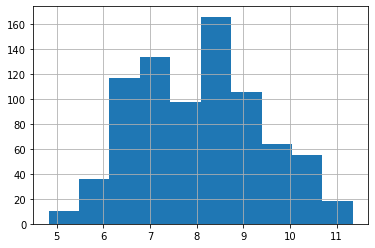

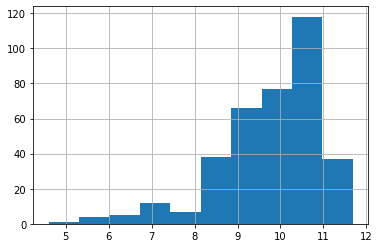

In [17]:
np.log(gdp[gdp["ratio"]<.5]['gdp']).hist()
plt.show()
np.log(gdp[gdp["ratio"]>.5]['gdp']).hist()
plt.show()

In [18]:
# let's see whether having a high female/make smoker ratio means less or more smoking

In [17]:
both = ww_tobacco[ww_tobacco["Gender"] == "Both sexes"].set_index(["Location", "Year"])
both["ratio"] = bi

# USE THIS CSV
both.to_csv("both_ratio.csv")
both

,,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,ratio
Location,Year,,,,,,
Eswatini,2018,AFR,Africa,SWZ,Both sexes,10.7,0.115183
Bahamas,2018,AMR,Americas,BHS,Both sexes,10.9,0.172043
Jamaica,2018,AMR,Americas,JAM,Both sexes,11.0,0.237288
Chad,2018,AFR,Africa,TCD,Both sexes,11.8,0.107981
Kenya,2018,AFR,Africa,KEN,Both sexes,11.8,0.134615
...,...,...,...,...,...,...,...
Kiribati,2000,WPR,Western Pacific,KIR,Both sexes,67.9,0.662179
Nigeria,2000,AFR,Africa,NGA,Both sexes,7.3,0.131783
Niger,2000,AFR,Africa,NER,Both sexes,7.9,0.161765


In [19]:
from scipy import stats

In [20]:
vals = []
for year, dat in both.groupby('Year'):
    low = dat[dat["ratio"]<.5]['Value']
    high = dat[dat["ratio"]>.5]['Value']
    ttest = stats.ttest_ind(low, high, nan_policy = 'omit', equal_var = False)
    vals.append([year, low.mean(), high.mean(), ttest.statistic, ttest.pvalue])
pd.DataFrame(vals, columns = ['Year', "Smoker % for Low Ratio Group", "Smoker % for High Ratio Group", "t-Test Statistic", "P-value"]).set_index('Year')

,Smoker % for Low Ratio Group,Smoker % for High Ratio Group,t-Test Statistic,P-value
Year,,,,
2000,26.196875,39.801887,-7.034893,1.685012e-10
2005,24.628283,34.662000,-5.574089,1.671684e-07
2010,22.712621,31.471739,-5.059670,1.939616e-06
2013,21.669811,30.104651,-4.773403,7.828806e-06
2014,21.226667,29.611628,-4.743312,8.905756e-06
2015,20.865714,29.143182,-4.773708,7.616055e-06
2016,20.512381,28.663636,-4.698435,1.042099e-05
2017,20.196190,28.227273,-4.634899,1.347679e-05
2018,19.887619,27.781818,-4.552921,1.864514e-05


In [20]:
both[both['ratio']>.5]["Value"].describe()

count    411.000000
mean      31.304136
std       10.440769
min        9.400000
25%       24.400000
50%       29.500000
75%       36.300000
max       71.000000
Name: Value, dtype: float64

In [21]:
both[both['ratio']<.5]["Value"].describe()

count    929.000000
mean      21.928741
std       10.491698
min        3.700000
25%       13.600000
50%       21.500000
75%       28.700000
max       61.800000
Name: Value, dtype: float64

<AxesSubplot:>

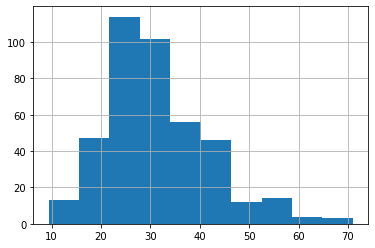

In [22]:
both[both['ratio']>.5]["Value"].hist()

<AxesSubplot:>

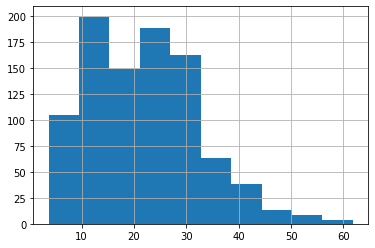

In [23]:
both[both['ratio']<.5]["Value"].hist()

In [24]:
both.reset_index()["Year"].value_counts()

2018    149
2017    149
2016    149
2015    149
2014    149
2013    149
2010    149
2005    149
2000    149
Name: Year, dtype: int64

In [25]:
bi

Location  Year
Albania   2000    0.193380
          2005    0.180832
          2010    0.171053
          2013    0.165385
          2014    0.164410
                    ...   
Zimbabwe  2014    0.057348
          2015    0.054545
          2016    0.051471
          2017    0.052045
          2018    0.049057
Name: Value, Length: 1341, dtype: float64

In [26]:
bi.reset_index()["Location"]

0        Albania
1        Albania
2        Albania
3        Albania
4        Albania
          ...   
1336    Zimbabwe
1337    Zimbabwe
1338    Zimbabwe
1339    Zimbabwe
1340    Zimbabwe
Name: Location, Length: 1341, dtype: object

In [74]:
# un gender inequality
# http://hdr.undp.org/en/indicators/68606#
gii = pd.read_csv('gii.csv', skiprows=5, encoding='latin-1')
gii = gii.drop(columns = gii.columns[gii.columns.str.contains("Unnamed")])
gii = gii.replace({"..": np.nan})
gii = gii[gii["HDI Rank"].str.isnumeric().fillna(False)].copy()
gii = gii.drop(columns = "HDI Rank")
gii = gii.melt(id_vars = ["Country"], var_name = "Year", value_name = "gii")
gii["Year"] = gii["Year"].astype(int)
gii["Country"] = gii["Country"].str.lstrip(' ')
gii["gii"] = gii["gii"].astype(float)

gii = gii.rename(columns = {"Country": "Location"}).set_index(["Location", "Year"])
gii = gii.join(bi, how = 'inner').dropna()
gii = gii.rename(columns = {"Value": 'ratio'})

# USE THIS CSV
gii.to_csv('gii_ratio.csv')
gii

,,gii,ratio
Location,Year,,
Albania,2000,0.334,0.193380
Algeria,2000,0.624,0.056604
Argentina,2000,0.417,0.728972
Armenia,2000,0.473,0.039334
Australia,2000,0.160,0.842809
...,...,...,...
Uruguay,2018,0.285,0.730159
Uzbekistan,2018,0.288,0.055794
Yemen,2018,0.811,0.286154


In [75]:
gii = gii.reset_index()

In [100]:
vals = []
for year, dat in gii.groupby('Year'):
    low = dat[dat["ratio"]<.5]['gii']
    high = dat[dat["ratio"]>.5]['gii']
    ttest = stats.ttest_ind(low, high, nan_policy = 'omit', equal_var = False)
    vals.append([year, low.mean(), high.mean(), ttest.statistic, ttest.pvalue])
pd.DataFrame(vals, columns = ['Year', "Mean GII for Low Ratio Group", "Mean GII for High Ratio Group", "t-Test Statistic", "P-value"]).set_index('Year')

,Mean GII for Low Ratio Group,Mean GII for High Ratio Group,t-Test Statistic,P-value
Year,,,,
2000,0.518215,0.270629,6.923679,2.630869e-09
2005,0.486526,0.237950,7.930164,1.679084e-11
2010,0.452549,0.183872,10.737749,3.028661e-18
2013,0.425536,0.162595,10.296386,6.626695e-17
2014,0.428157,0.159417,10.308640,1.180397e-16
2015,0.431667,0.150162,11.292515,3.951036e-19
2016,0.425865,0.151737,10.948699,1.473232e-18
2017,0.412101,0.143027,10.759245,5.417311e-18
2018,0.408090,0.142211,10.832564,1.618473e-18


In [28]:
gii[gii['ratio']>.5]["gii"].describe()

count    337.000000
mean       0.177846
std        0.134282
min        0.039000
25%        0.084000
50%        0.134000
75%        0.217000
max        0.683000
Name: gii, dtype: float64

In [29]:
gii[gii['ratio']<.5]["gii"].describe()

count    744.000000
mean       0.440195
std        0.158815
min        0.066000
25%        0.318750
50%        0.452000
75%        0.559000
max        0.819000
Name: gii, dtype: float64

<AxesSubplot:>

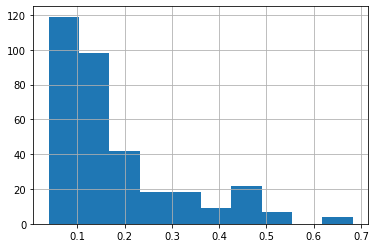

In [30]:
gii[gii['ratio']>.5]["gii"].hist()

<AxesSubplot:>

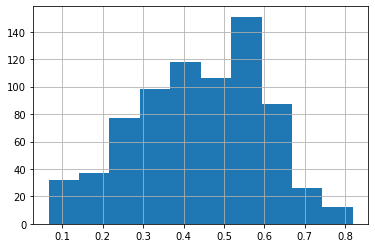

In [31]:
gii[gii['ratio']<.5]["gii"].hist()

In [32]:
# it almost looks like having more women smoke just increases the mean on the distribution (ie. women smoking doesn't seem to change male smoking??)
# HYPOTHESIS: more progressive countries (where women smoking is more accepted) just see an increase in women smoking
    # -- could we test this by taking a low ratio countries and simulate adding more women smokers?

In [33]:
# gender results so far:
# men smoke much more than women in the us (from Jun)
# COPD has much higher mortality in men than women (from Chloris)

# tentative results so far (could use some statistical tests or not):
# bimodal distribution of female/male smoker ratio
# the two clusters for the two modes in the distribution seem to be in different geographic locations (Europe has high ratios, Africa and West Pacific have low ratios)
# likewise richer countries (higher per capita gdp) seem to have higher ratios
# when the female/male smoker ratio is high, it doesn't seem to mean that less men are smoking, only that more women are smoking
# confirmed by UN gender inequality index, looks like high ratio countries have low inequality and vice versa 

# maybe we could try looking at change over time? -- as gdp/gii increased, did women smoking also increase? (when controlling for global decrease in smoking)

# we can focus on the narrative that "cultural acceptance" of women smoking leads to high rates of women smoking while leaving men unaffected
    # be very sure to clarify that this is NOT an argument against women's rights/equality 
    # maybe talk about how this could be a very serious problem for developing countries that are likely to decrease gender inequality (citation?)
        # -> could lead to more women smoking which would require forward action
